# Sample code from *Hands-On Machine Learning*
One of the best ways to learn to code is to read and understand code written by experienced programmers.  

This code comes from the book *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition* by Aurélien Géron.  From the UC Irvine campus (or using VPN), the book can be accessed through [O'Reilly textbooks](https://www.oreilly.com/library/view/temporary-access/).  The code was copied from the corresponding [GitHub page](https://github.com/ageron/handson-ml2).  Some small modifications have been made to incorporate additional Math 10 material.  (Here is the [License](https://github.com/ageron/handson-ml2/blob/master/LICENSE).)

## Worksheet assignment
You can download this notebook by clicking the link at the top right of the page, and then right-clicking on the `.ipynb` option.  You need to download this notebook so you can evaluate this code yourself.

Take notes on one of the notecards distributed in class.  The notes can be anything you think is useful from this code.  The notes could be things like: what are the different modules used for?  What is the syntax for plotting in Seaborn vs Matplotlib?

The notes should include a description of how to perform linear regression using scikit-learn.

Write the **names** of everyone in your group at the top of the notecard.

Upload a picture of the notecard to Canvas.  (If you don't receive a notecard, you can take notes on an ordinary sheet of paper.)

**Remark**: You are allowed to use a (different) notecard with notes during the midterm.  So while you are taking notes, be thinking about what sort of material would be useful for the midterm.

## Advice

Don't be intimidated if some of this material looks very unfamiliar.  Almost all code looks unfamiliar the first time you see it.  Even if you return to some of your earlier Math 10 assignments, the code *you* wrote might also look confusing.

## Preparing the data

In [4]:
import os
import urllib.request

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

import sklearn
import sklearn.linear_model

In [5]:
assert sklearn.__version__ >= "0.20"

In [6]:
os.getcwd()

'/Users/christopherdavis/Dropbox/Teaching/Textbooks/UCI-Math-10'

In [7]:
datapath = os.path.join("datasets", "lifesat", "")

In [8]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print(f"Downloading {filename}")
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [9]:
os.listdir(datapath)

['oecd_bli_2015.csv', 'gdp_per_capita.csv']

In [24]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

The next function `prepare_country_stats` is a little more complicated than the rest of the code, so focus on the rest of the code before returning to this function.

In [25]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    try:
        gdp_per_capita.set_index("Country", inplace=True)
    except KeyError:
        pass
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [26]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

Getting data for the *predictor* (input) variable $X$ and the *target* (output) variable $y$.

In [27]:
X = np.array(country_stats["GDP per capita"]).reshape(-1,1)
y = np.array(country_stats["Life satisfaction"]).reshape(-1,1)

## Linear regression with scikit-learn

In [28]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


## Four examples of plotting the data

In [29]:
# Altair
alt.Chart(country_stats).mark_circle().encode(
    x = "GDP per capita",
    y = "Life satisfaction"
)

alt.Chart(...)

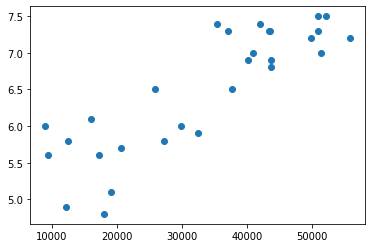

In [30]:
# Matplotlib
fig, ax = plt.subplots()
ax.scatter(X,y)

<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

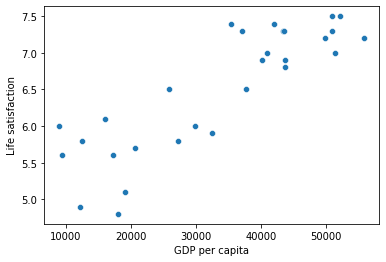

In [31]:
# Seaborn
sns.scatterplot(data=country_stats, x="GDP per capita", y = "Life satisfaction")

<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

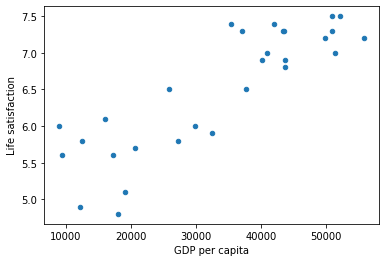

In [32]:
# pandas
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')